### 这是lesson6 groupby的练习题
   - 小费，指给予服务生消费额以外的赏钱，在美国餐馆用餐完后通常会给服务生15-20%的小费。
   - 这个数据是由Bryant和Smith于1995年所著的商务统计上的一个数据

#### 任务：分析什么因素会影响小费比例？
   - 一个优秀的数据分析员一定是一个可以提出有意义问题的人
   - 好的数据分析员往往可以根据商业背景提出一些假说，然后通过数据来验证这些假说

In [13]:
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format="retina"

In [86]:
tips=pd.read_csv("/Users/dengsudden/Documents/python_course/tips.csv",sep=";")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 思路 [研究小费比例与消费额、性别、用餐时间、用餐人数、吸烟习惯的关系]
   - 首先计算出小费比例
   - 提出假设：小费比例与消费额成正比，与用餐人数成正比，有吸烟习惯的人小费比例更高，男性比女性小费比例高，晚餐比午餐小费比例高，周末小费比例更高
   - 验证假设

In [87]:
# 计算小费比例
tips["pct"]=tips.tip/tips.total_bill*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### 数据清洗：首先来看看离群值是否是异常值
  - 画出整体数据小费比例的箱线图，可以看到离群值
  - 根据箱线图中离群值范围，找出离群值具体数据情况，判别是否为异常值
  - 使用df.drop([index1,index2,])去除数据中的异常值

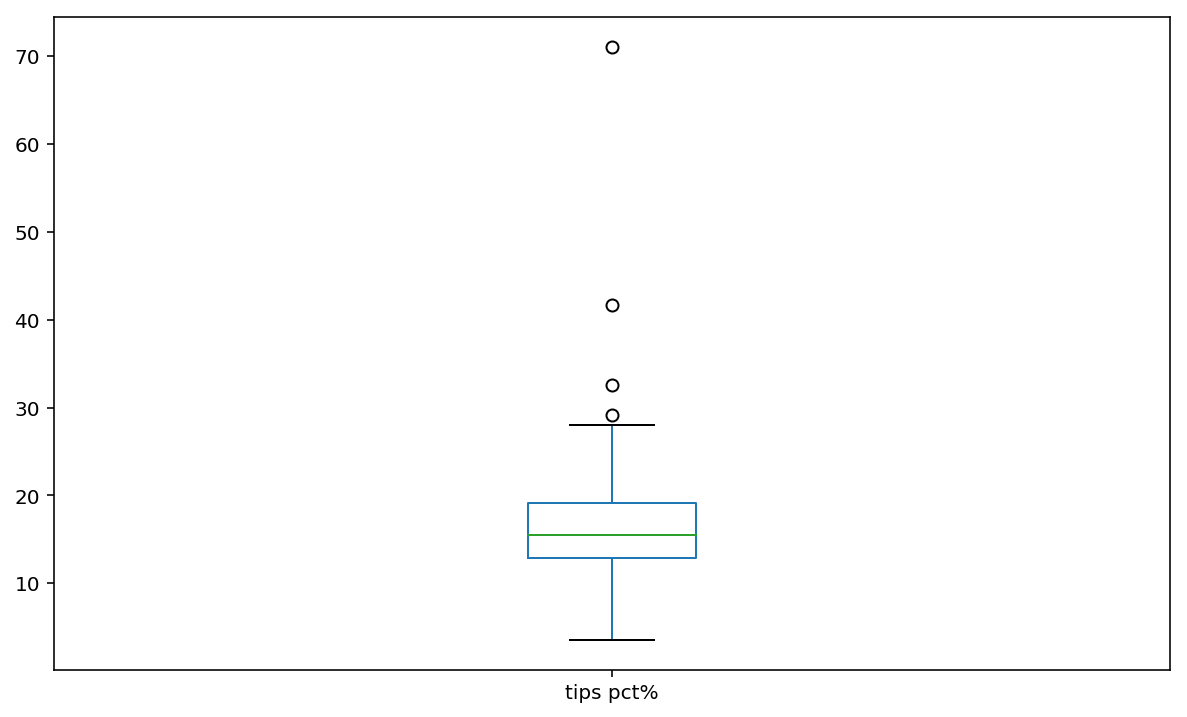

In [88]:
#整体数据的小费比例箱线图
tips.pct.plot(kind="box",label="tips pct%",figsize=(10,6))

#### 从整体数据来看，小费比例最小在3%左右，最大在70%左右，中位数在15%左右，均值为16%，这是一个很大的范围，我们需要深入到各个纬度去研究小费比例的关联因素。小费比例高于30%被认为是离群值，下面我看来看看这几个离群值是否是异常值。

In [89]:
tips[tips.pct>30]

,total_bill,tip,sex,smoker,day,time,size,pct
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667


#### 可以看到，小费比例较高的这几个离群值，小费总额都不到10美元，而小费比例就超出一半，可以认为这是异常值，因此我们剔除掉这些异常值。然后再开始数据挖掘。

In [97]:
# 去除异常值
tipa=tips.drop([67,172,178])
tipa[tipa.pct>30]
#tipa.head()

,total_bill,tip,sex,smoker,day,time,size,pct


### 数据挖掘：影响小费比例的因素

### 小费比例与性别、星期几的关系

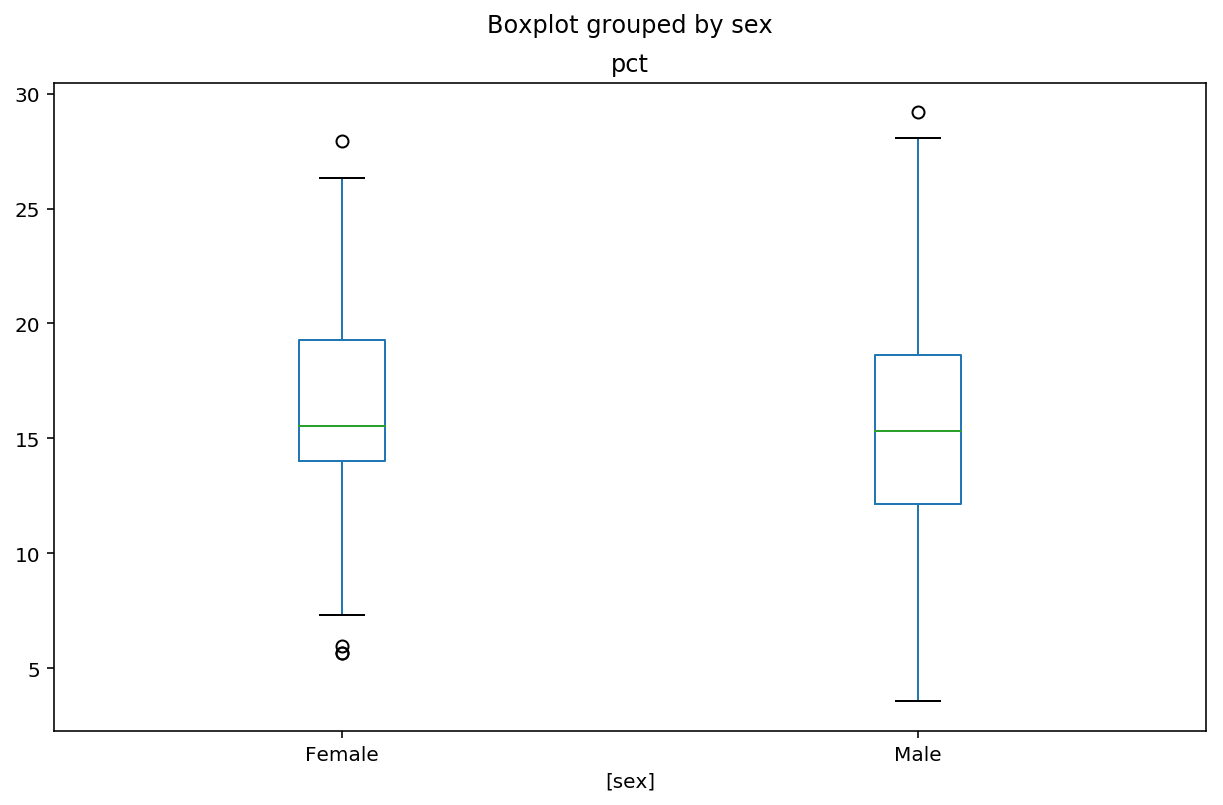

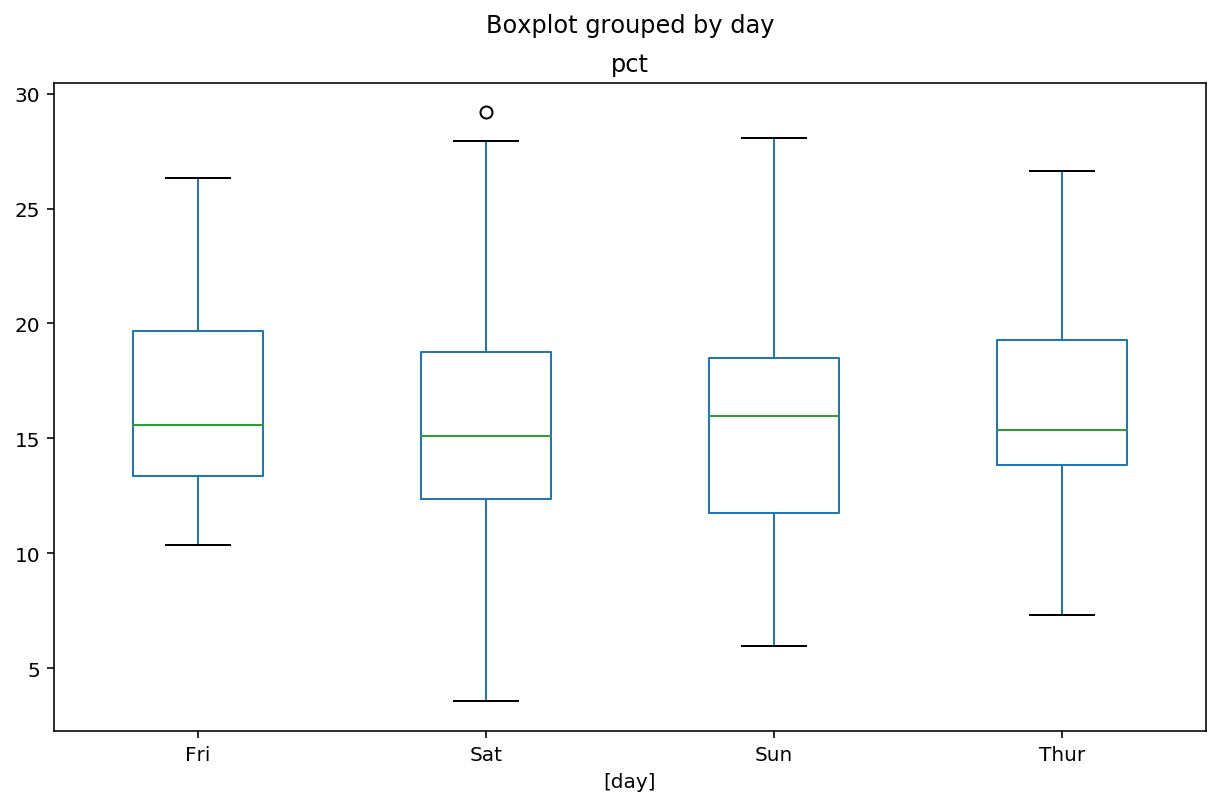

In [91]:
#按男女分组，绘制小费比例箱线图
tipa[["pct","sex"]].boxplot(grid=False,by="sex",figsize=(10,6))

#按星期几分组，绘制小费比例箱线图
tipa[["pct","day"]].boxplot(grid=False,by="day",figsize=(10,6))

#### 1. 按性别分组来看，男女性的中位数接近，男性的小费比例分布非常均匀，女性的小费比例下四分位数更加靠上，说明女性更容易给出更高的小费。

#### 2. 按日期分组来看，周四到周天的小费比例中位数区别不大，节假日的周六周天人们给小费更加随意一点，特别是周六，小费比例范围跨度达到了25%，原因可能在于周末人们拥有更加轻松愉快的心情（说不定周末相亲的人也更多，小费比例高呢）。而这两天也更容易出现高到离谱的小费比例，我猜猜是不是周末喝高了，小手一抖，小费出手。

### 小费比例与吸烟习惯、性别的关系

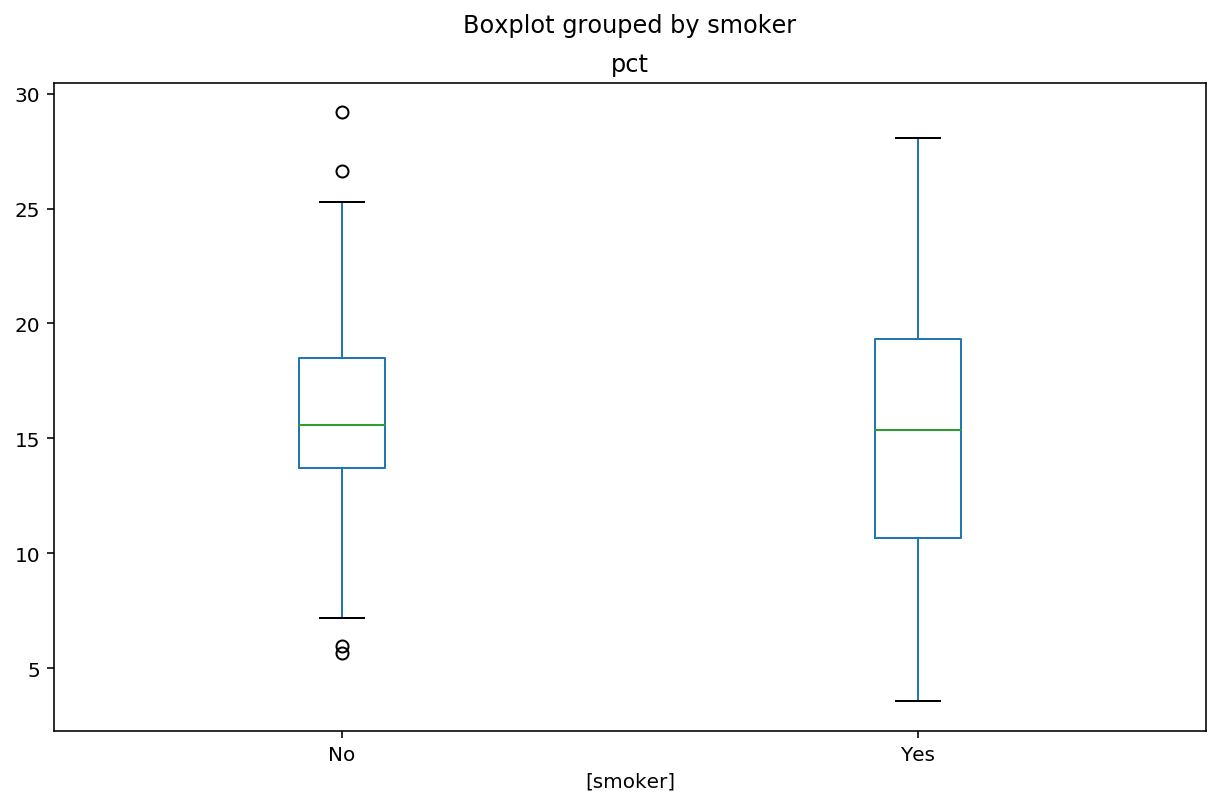

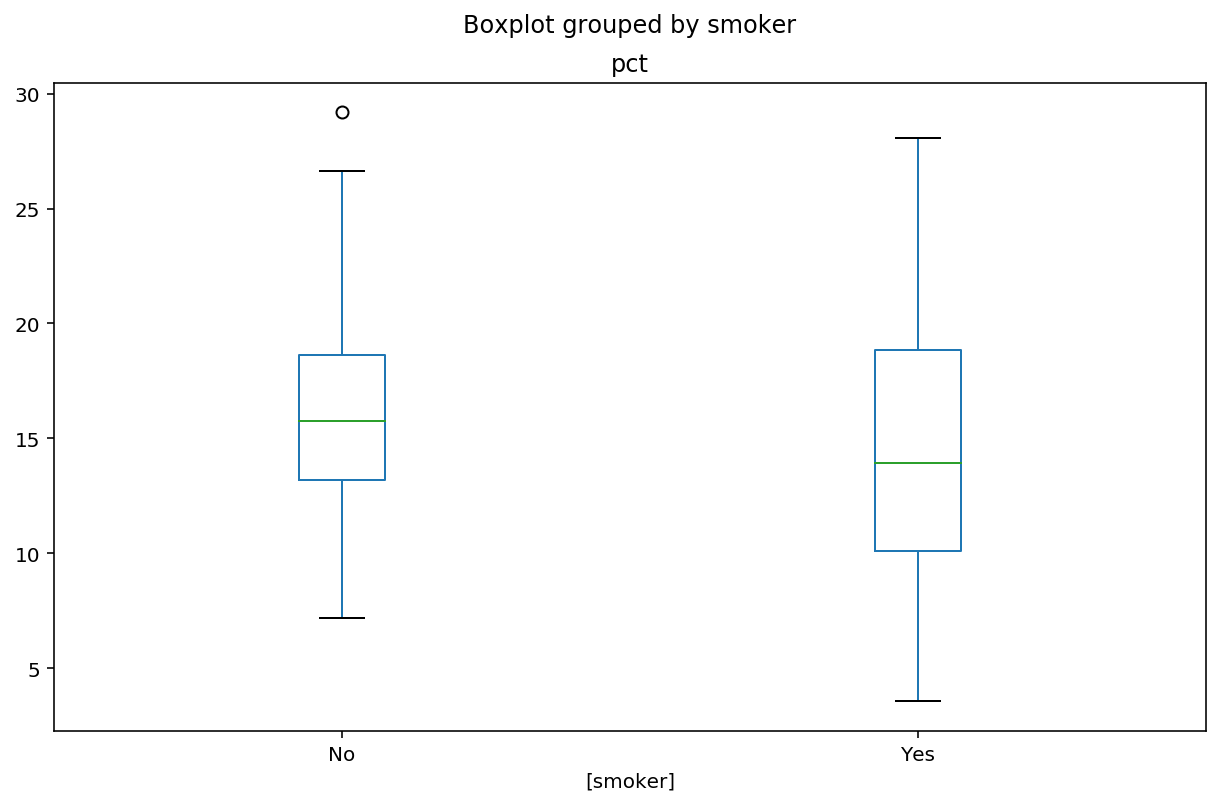

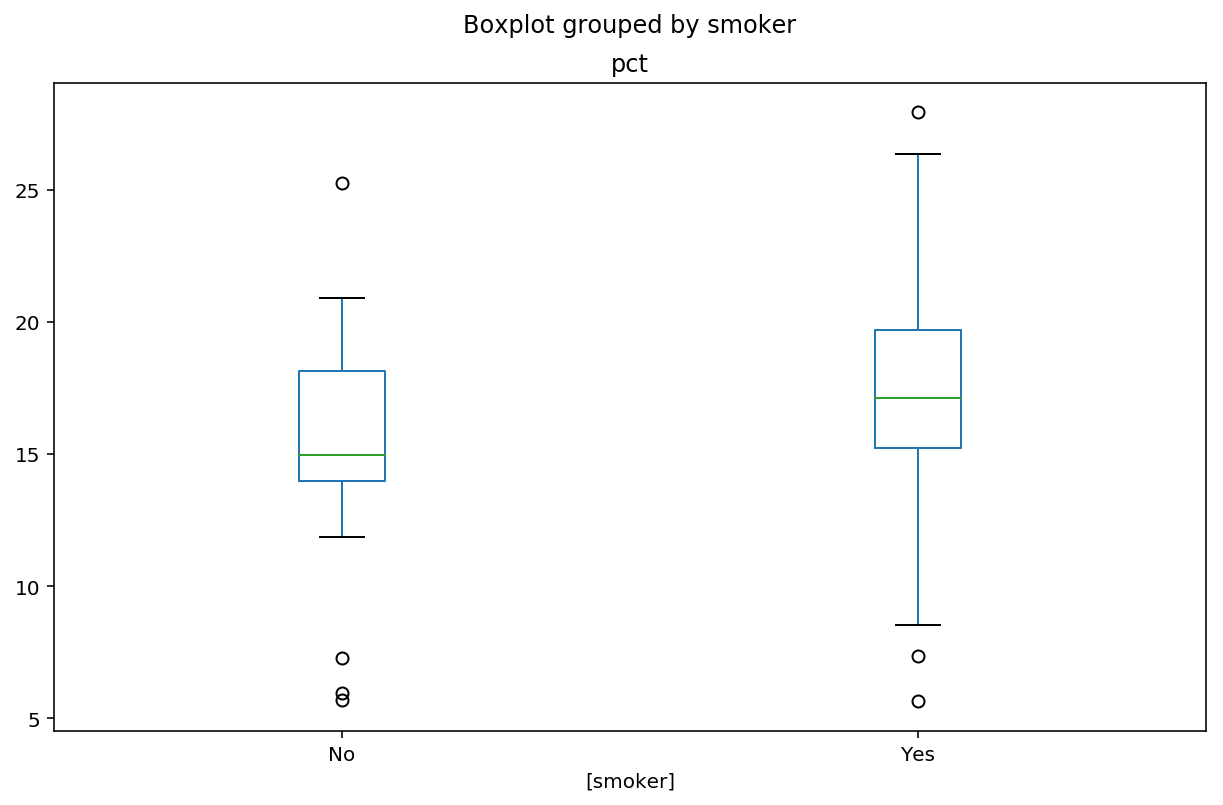

In [92]:
# 是否吸烟与小费比例关系
tipa[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))

# 按性别分组，寻找吸烟与否与小费比例关系
tipsm=tipa[tipa.sex=="Male"]
tipsf=tipa[tipa.sex=="Female"]

tipsm[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))
tipsf[["pct","smoker"]].boxplot(grid=False,by="smoker",figsize=(10,6))

#### 按吸烟习惯来看，吸烟的人出手更加随意，小费比例范围更广，而不吸烟的人出手更加谨慎。我想其中的原因可能在于吸烟者觉得自己带给了别人更多不方便，当然，也可能和吸烟者的经济状况、付费习惯有关。

#### 将数据按性别分组，男性中的不吸烟群体的小费比例比吸烟群体要高，其中的原因可能是不吸烟的男性可能拥有更高的教育水平和经济能力。女性中的吸烟群体的小费比例明显高于不吸烟群体，中位数超过女性不吸烟群体3%左右，分布范围也更广。

### 小费比例与用餐时段的关系

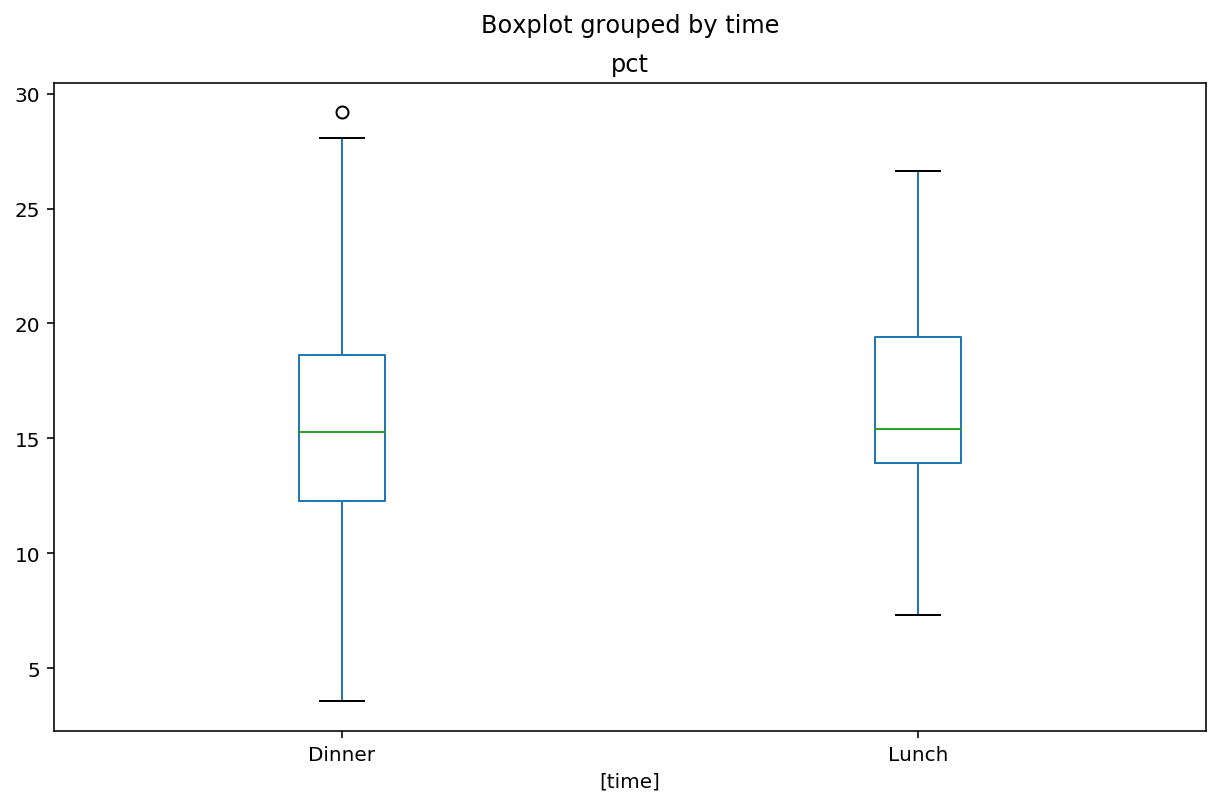

In [93]:
tipa[["pct","time"]].boxplot(grid=False,by="time",figsize=(10,6))

#### 从用餐时段来看，午餐的小费比例范围较窄，晚餐时段的小费比例随意性较大，这可能是由于晚餐时段用餐时长更长、餐费更高、很可能用了酒类饮料，使得小费比例较高。

In [94]:
#小费比例与用餐人数的关系
tipa.groupby("size").mean()

,total_bill,tip,pct
size,,,
1,8.633333,1.583333,18.114505
2,16.552208,2.556429,16.055313
3,23.277632,3.393158,15.215685
4,28.613514,4.135405,14.594901
5,30.068000,4.028000,14.149549
6,34.830000,5.225000,15.622920


#### 可以看到，小费比例随用餐人数的增加而降低

### 至此，我们可以勾勒一个小费狂魔的画像：周六单独来餐厅吃晚餐的吸烟男性。

In [95]:
tipa.groupby("sex").mean()

,total_bill,tip,size,pct
sex,,,,
Female,18.332706,2.841294,2.482353,16.167405
Male,20.830577,3.076410,2.634615,15.410763


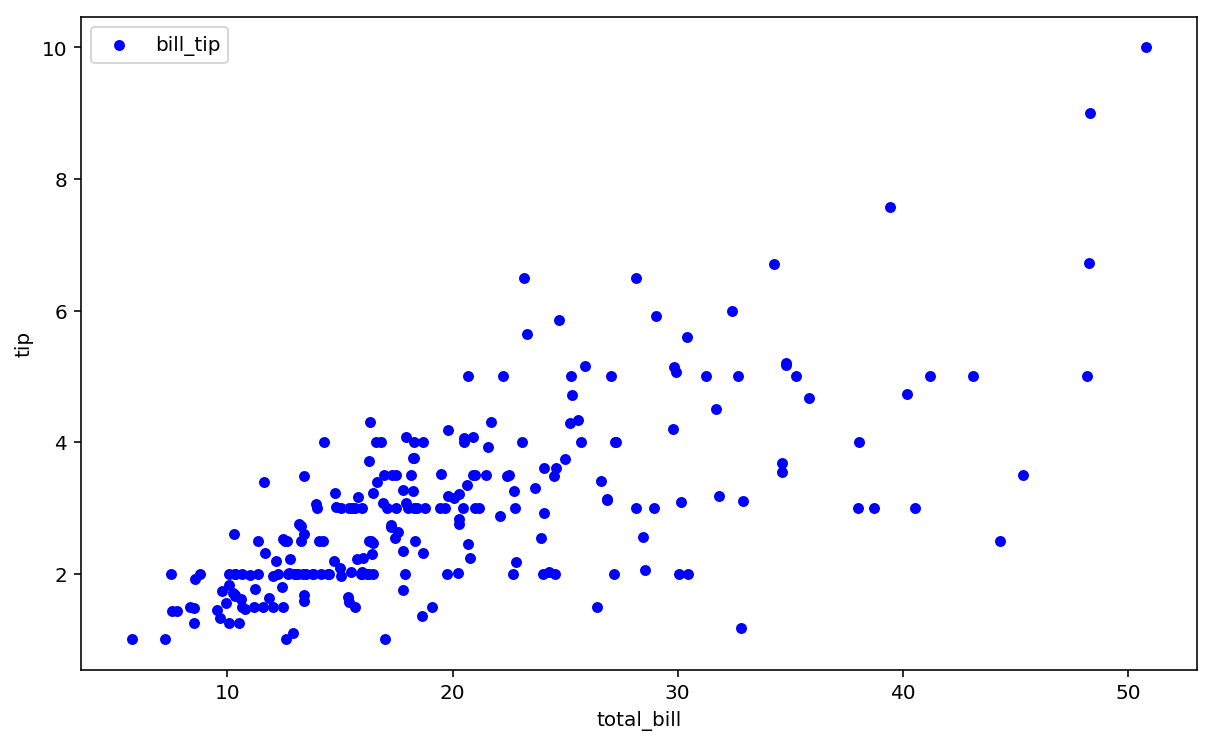

In [98]:
tipa.plot(kind="scatter",x="total_bill",y="tip",color="blue",label="bill_tip",figsize=(10,6))